In [14]:
from semantic_chunkers import StatisticalChunker
from semantic_router.encoders import HuggingFaceEncoder
from pymongo import MongoClient
from datetime import datetime


In [2]:
with open('data_for_chunks/su_ky_30_preproccesssing.txt','r', encoding='utf-8') as suky_doc:
    documents=suky_doc.read()
print(documents[:2000])

Các bạn đồng nghiệp CMC thân mến, Đối với mỗi người, tuổi 30 đánh dấu sự trưởng thành, vững vàng; là giai đoạn chuyển mình  với những hoài bão, khát khao cống hiến và mang lại nhiều giá trị hơn cho cuộc đời.
Với CMC, tuổi 30 là dấu mốc quan trọng trên hành trình xây dựng và phát triển mới để trở  thành Tập đoàn số toàn cầu với một ước mơ lớn, một sứ mệnh lớn lao hơn: tạo ra ngày  càng nhiều những Di sản số cho chính chúng ta và cho đất nước, xã hội.
Cuốn Sử ký CMC 30 - “Kiến tạo di sản số” là chuyến hành trình trở về những dấu mốc,  những trang nhật ký hào hùng trong suốt 30 năm xây dựng và phát triển của Tập đoàn. 
Ký ức 30 năm ấy, là bức phác họa chân thực nhất về hình ảnh Người CMC ngay từ những  ngày đầu khởi nghiệp; là hình ảnh mộc mạc, giản dị của những kỹ sư công nghệ đầy đam  mê, bản lĩnh; dám nghĩ, dám làm; là dấu chân của hàng ngàn anh em CMC nhiệt huyết, kỷ  luật, sáng tạo trong từng công việc được giao; là khát khao, là sự nỗ lực không ngừng nghỉ  để tạo nên những thành tựu

In [5]:
model_name = "hiieu/halong_embedding"
encoder=HuggingFaceEncoder(name=model_name)
statistic_chunking = StatisticalChunker(encoder=encoder,min_split_tokens=50,max_split_tokens=200)

In [4]:

chunks_stas = statistic_chunking(docs=[documents])
statistic_chunking.print(chunks_stas[0])

2024-11-07 20:49:54 INFO semantic_chunkers.utils.logger Single document exceeds the maximum token limit of 200. Splitting to sentences before semantically merging.
100%|██████████| 28/28 [03:51<00:00,  8.25s/it]

Split 1, tokens 101, triggered by: token limit
Các bạn đồng nghiệp CMC thân mến, Đối với mỗi người, tuổi 30 đánh dấu sự trưởng thành, vững vàng; là giai đoạn chuyển mình  với những hoài bão, khát khao cống hiến và mang lại nhiều giá trị hơn cho cuộc đời.
----------------------------------------------------------------------------------------


Split 2, tokens 122, triggered by: token limit
Với CMC, tuổi 30 là dấu mốc quan trọng trên hành trình xây dựng và phát triển mới để trở  thành Tập đoàn số toàn cầu với một ước mơ lớn, một sứ mệnh lớn lao hơn: tạo ra ngày  càng nhiều những Di sản số cho chính chúng ta và cho đất nước, xã hội.
----------------------------------------------------------------------------------------


Split 3, tokens 84, triggered by: token limit
Cuốn Sử ký CMC 30 - “Kiến tạo di sản số” là chuyến hành trình trở về những dấu mốc,  những trang nhật ký hào hùng trong suốt 30 năm xây dựng và phát triển của Tập đoàn.
-------------------------------------------------------

In [5]:
chunk_list=[x.content for x in chunks_stas[0]]
chunk_lengths = [(chunk,len(chunk)) for chunk in chunk_list]
print(max(chunk_lengths))

('“Vậy tại sao, ở thị trường Việt Nam, mình không tự tạo nên một công  ty có thể vừa kinh doanh và lắp ráp máy tính thương hiệu Việt mà  không cần phụ thuộc vào các nước khác” - anh Chính suy nghĩ.', 195)


In [6]:
chunks_stas[0][0].content

'Các bạn đồng nghiệp CMC thân mến, Đối với mỗi người, tuổi 30 đánh dấu sự trưởng thành, vững vàng; là giai đoạn chuyển mình  với những hoài bão, khát khao cống hiến và mang lại nhiều giá trị hơn cho cuộc đời.'

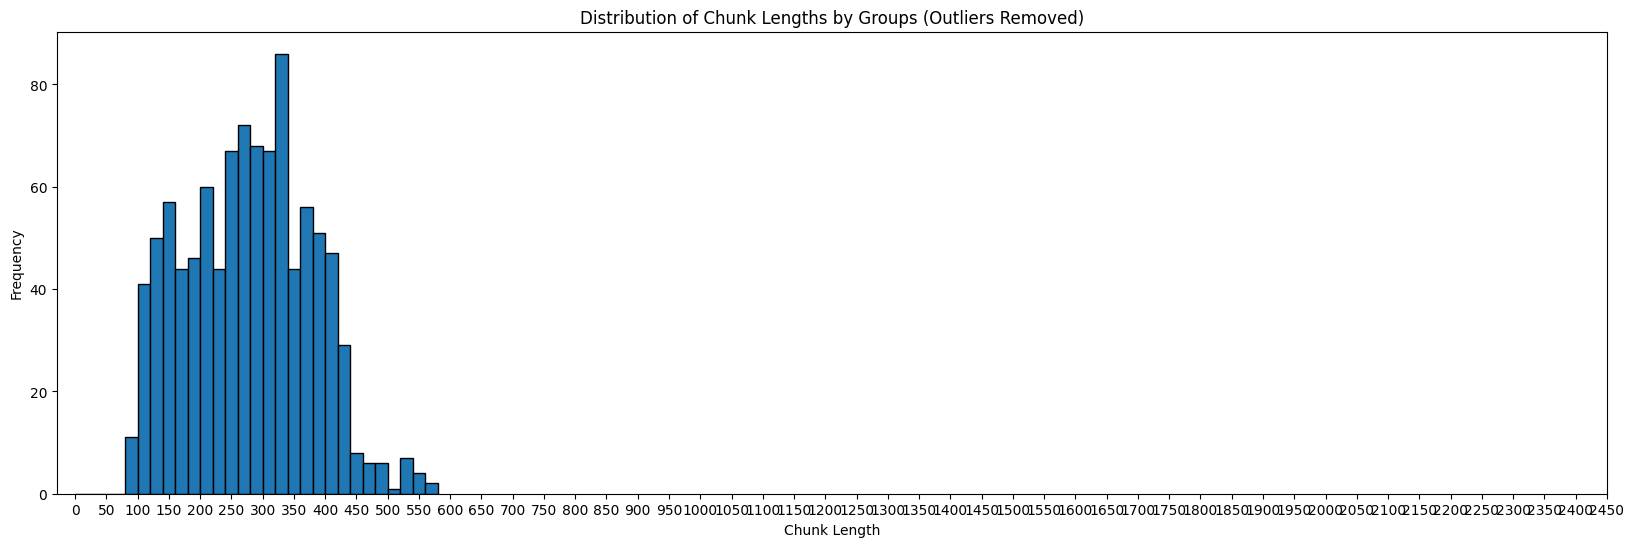

In [7]:
import matplotlib.pyplot as plt
import numpy as np


# Step 1: Calculate the length of each chunk
chunk_lengths = [len(chunk) for chunk in chunk_list]

# Step 2: Remove outliers using the 1.5*IQR rule
q1 = np.percentile(chunk_lengths, 25)
q3 = np.percentile(chunk_lengths, 75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Filter out chunk lengths outside of the lower and upper bounds
filtered_chunk_lengths = [length for length in chunk_lengths if lower_bound <= length <= upper_bound]

# Step 3: Define the bins for the ranges (0-20, 20-40, etc.)
bins = np.arange(0, max(filtered_chunk_lengths) + 20, 20)  # Adjust the bin size if needed (20 in this case)

# Step 4: Plot histogram of filtered chunk lengths with defined bins
plt.figure(figsize=(20, 6))
plt.hist(chunk_lengths, bins=bins, edgecolor='black')

# Step 5: Customize the x-axis labels to be more dense
plt.xticks(np.arange(0, max(chunk_lengths) + 50, 50))  # Make x-axis labels denser

# Adding labels and title
plt.xlabel('Chunk Length')
plt.ylabel('Frequency')
plt.title('Distribution of Chunk Lengths by Groups (Outliers Removed)')

# Display the plot
plt.show()


In [8]:
chunk_text=[x.content for x in chunks_stas[0]]

In [ ]:

# Connect to the MongoDB server
client = MongoClient('mongodb://localhost:27017/')
server_info = client.server_info()  # Will throw an exception if not connected
print("MongoDB connection successful!")
print("Server information:", server_info)

# Access the database and collections
db = client['cmc_data_3']
collection = db['resource']
counter_collection = db['counters']  # Collection to store the counter for auto-increment

# Function to get the next auto-incrementing id
def get_next_id():
    counter_doc = counter_collection.find_one_and_update(
        {'_id': 'resource_id'},
        {'$inc': {'count': 1}},
        upsert=True,
        return_document=True
    )
    return counter_doc['count']

# Prepare documents for insertion
current_month = datetime.now().strftime('%Y-%m')
docs = [{'_id': get_next_id(), 'page_content': x.content, 'date': current_month, 'source': 'Su ky CMC30.pdf'} for x in chunks_stas[0]]

# Insert documents into the collection
collection.insert_many(docs)
print("Data inserted successfully!")

# List databases and collections for verification
print("Databases:", client.list_database_names())
print("Collections in 'cmc_data':", db.list_collection_names())

# Close the connection
client.close()


MongoDB connection successful!
Server information: {'version': '8.0.3', 'gitVersion': '89d97f2744a2b9851ddfb51bdf22f687562d9b06', 'targetMinOS': 'Windows 7/Windows Server 2008 R2', 'modules': [], 'allocator': 'tcmalloc-gperf', 'javascriptEngine': 'mozjs', 'sysInfo': 'deprecated', 'versionArray': [8, 0, 3, 0], 'openssl': {'running': 'Windows SChannel'}, 'buildEnvironment': {'distmod': 'windows', 'distarch': 'x86_64', 'cc': 'cl: Microsoft (R) C/C++ Optimizing Compiler Version 19.31.31107 for x64', 'ccflags': '/nologo /WX /FImongo/platform/basic.h /fp:strict /EHsc /W3 /wd4068 /wd4244 /wd4267 /wd4290 /wd4351 /wd4355 /wd4373 /wd4800 /wd4251 /wd4291 /we4013 /we4099 /we4930 /errorReport:none /MD /O2 /Oy- /bigobj /utf-8 /permissive- /Zc:__cplusplus /Zc:sizedDealloc /volatile:iso /diagnostics:caret /std:c++20 /Gw /Gy /Zc:inline', 'cxx': 'cl: Microsoft (R) C/C++ Optimizing Compiler Version 19.31.31107 for x64', 'cxxflags': '/TP', 'linkflags': '/nologo /DEBUG /INCREMENTAL:NO /LARGEADDRESSAWARE /O

In [6]:
from datetime import datetime
import math

# Updated date formats with added format to handle '14 October 2024'
date_formats = ["%d/%m/%Y", "Th%m %d, %Y", "%d-%m-%Y", "%d %B %Y","%Y-%m"]

def parse_date(date_str):
    # Skip non-string entries or NaN values
    if not isinstance(date_str, str) or date_str == "":
        return None
    for fmt in date_formats:
        try:
            date_obj = datetime.strptime(date_str, fmt)
            return date_obj.strftime("%Y-%m")  # Convert to desired format
        except ValueError:
            continue
    raise ValueError(f"Date format for '{date_str}' not recognized")

dates = ["09/09/2022", "Th10 04, 2024", "08-10-2024", '', '14 October 2024','2023-01']

# Example usage in list comprehension with handling for floats
formatted_dates = [parse_date(str(date_str)) if not (isinstance(date_str, float) and math.isnan(date_str)) else None for date_str in dates]
print(formatted_dates)


['2022-09', '2024-10', '2024-10', None, '2024-10', '2023-01']


In [15]:
import pandas as pd

def handling_csv(dir,csv_path):
    df=pd.read_csv(dir+'/'+csv_path)
    print('number of documents:', df.shape[0])
    if len(df.columns)>3:
        # Combine 'title' and 'date' with 'content'
        df['content'] = df['title'] + ' ' + df['date'].astype(str) + '\n' + df['content']

        # Drop 'title' and 'date' columns
        df.drop(columns=['title'], inplace=True)    

        date=df['date'].to_list()
        formatted_date=[parse_date(date_str) for date_str in date]
        print('lastest date updated:', formatted_date[0])
    elif len(df.columns)==3:
        date=df['date'].to_list()
        formatted_date=[parse_date(date_str) for date_str in date]
        print('lastest date updated:', formatted_date[0])
    else:
        current_month = datetime.now().strftime('%Y-%m')
        formatted_date=[current_month for x in range(df.shape[0])]

    # Step 3: Remove rows where 'content' is NaN or missing
    df = df.dropna(subset=['content'])
    # Step 4: Ensure that all values in 'content' are strings
    df['content'] = df['content'].astype(str)
    docs=df['content'].to_list()
    url_sources=df['url'].to_list()
    chunks=statistic_chunking(docs)
    statistic_chunking.print(chunks[0])

    
    chunk_content=[]
    for idx,each_doc in enumerate(chunks):
        if formatted_date[idx]:
            chunk_content.extend([{
                'page_content':content.content,
                'date':formatted_date[idx],
                'url': url_sources[idx]
            } for content in each_doc if len(content.content)>10])
    print(chunk_content[:10])
    client =MongoClient('mongodb://localhost:27017/')
    db = client['cmc_data_3']

    collection = db['resource']
    counter_collection = db['counters']  # Collection to store the counter for auto-increment
    def get_next_id():
        counter_doc = counter_collection.find_one_and_update(
            {'_id': 'resource_id'},
            {'$inc': {'count': 1}},
            upsert=True,
            return_document=True
        )
        return counter_doc['count']
    chunk_docs=[{'_id': get_next_id(),'page_content':x['page_content'],'date': x['date'],'source':csv_path, 'url': x['url']} for x in chunk_content]
    collection.insert_many(documents=chunk_docs)

    client.close()


In [16]:
handling_csv('data_for_chunks','combined_posts.csv')

2024-11-08 12:34:02 INFO semantic_chunkers.utils.logger Single document exceeds the maximum token limit of 200. Splitting to sentences before semantically merging.


number of documents: 282
lastest date updated: 2024-10


100%|██████████| 1/1 [00:03<00:00,  3.28s/it]
2024-11-08 12:34:05 INFO semantic_chunkers.utils.logger Single document exceeds the maximum token limit of 200. Splitting to sentences before semantically merging.
100%|██████████| 1/1 [00:00<00:00,  1.80it/s]
2024-11-08 12:34:06 INFO semantic_chunkers.utils.logger Single document exceeds the maximum token limit of 200. Splitting to sentences before semantically merging.
100%|██████████| 1/1 [00:01<00:00,  1.25s/it]
2024-11-08 12:34:07 INFO semantic_chunkers.utils.logger Single document exceeds the maximum token limit of 200. Splitting to sentences before semantically merging.
100%|██████████| 1/1 [00:00<00:00,  1.90it/s]
2024-11-08 12:34:08 INFO semantic_chunkers.utils.logger Single document exceeds the maximum token limit of 200. Splitting to sentences before semantically merging.
100%|██████████| 1/1 [00:01<00:00,  1.52s/it]
2024-11-08 12:34:09 INFO semantic_chunkers.utils.logger Single document exceeds the maximum token limit of 200. Sp

Split 1, tokens 100, triggered by: 0.06
HỘI NGHỊ NGHIÊN CỨU KHOA HỌC SINH VIÊN TRƯỜNG ĐẠI HỌC CMC NĂM HỌC 2023 – 2024 VÀ TRIỂN LÃM CÔNG TRÌNH NGHIÊN CỨU KHOA HỌC SINH VIÊN
----------------------------------------------------------------------------------------


Split 2, tokens 86, triggered by: token limit
------------- Ngày 25 tháng 10 vừa qua, Trường Đại học CMC long trọng tổ chức “Hội nghị Nghiên cứu Khoa học sinh viên” năm học 2023 – 2024 và triển lãm các công trình nghiên cứu khoa học sinh viên.
----------------------------------------------------------------------------------------


Split 3, tokens 200, triggered by: token limit
Hội nghị được tổ chức nhằm tuyên dương và ghi nhận những nỗ lực nghiên cứu của các nhóm nghiên cứu khoa học (NCKH) trong năm học 2023 – 2024; phát động và triển khai hoạt động sinh viên NCKH trong toàn trường; hình thành khả năng NCKH độc lập, năng lực tự học, tính năng động và tư duy đổi mới sáng tạo của sinh viên Trường Đại học CMC. Tại Hội nghị, 25 n

In [36]:
import pandas as pd

def handling_csv_2(dir,csv_path,url):
    df=pd.read_csv(dir+'/'+csv_path)
    print('number of documents:', df.shape[0])
    if len(df.columns)>2:
        # Combine 'title' and 'date' with 'content'
        df['content'] = df['title'] + ' ' + df['date'].astype(str) + '\n' + df['content']

        # Drop 'title' and 'date' columns
        df.drop(columns=['title'], inplace=True)    

        date=df['date'].to_list()
        formatted_date=[parse_date(date_str) for date_str in date]
        print('lastest date updated:', formatted_date[0])
    else:
        current_month = datetime.now().strftime('%Y-%m')
        formatted_date=[current_month for x in range(df.shape[0])]
    # Step 3: Remove rows where 'content' is NaN or missing
    df = df.dropna(subset=['content'])
    # Step 4: Ensure that all values in 'content' are strings
    df['content'] = df['content'].astype(str)
    docs=df['content'].to_list()
    chunks=statistic_chunking(docs)
    statistic_chunking.print(chunks[0])

    
    chunk_content=[]
    for idx,each_doc in enumerate(chunks):
        if formatted_date[idx]:
            chunk_content.extend([{
                'page_content':content.content,
                'date':formatted_date[idx]
            } for content in each_doc if len(content.content)>10])
    print(chunk_content[:10])
    client =MongoClient('mongodb://localhost:27017/')
    db = client['cmc_data_3']

    collection = db['resource']
    counter_collection = db['counters']  # Collection to store the counter for auto-increment
    def get_next_id():
        counter_doc = counter_collection.find_one_and_update(
            {'_id': 'resource_id'},
            {'$inc': {'count': 1}},
            upsert=True,
            return_document=True
        )
        return counter_doc['count']
    chunk_docs=[{'_id': get_next_id(),'page_content':x['page_content'],'date': x['date'],'source':csv_path, 'url': url} for x in chunk_content]
    collection.insert_many(documents=chunk_docs)

    client.close()


In [37]:
handling_csv_2('data_for_chunks','about.csv','https://www.cmc.com.vn/introduction')

2024-11-08 00:48:43 INFO semantic_chunkers.utils.logger Single document exceeds the maximum token limit of 200. Splitting to sentences before semantically merging.


number of documents: 3


100%|██████████| 2/2 [00:06<00:00,  3.23s/it]
2024-11-08 00:48:50 INFO semantic_chunkers.utils.logger Single document exceeds the maximum token limit of 200. Splitting to sentences before semantically merging.
100%|██████████| 2/2 [00:08<00:00,  4.43s/it]
2024-11-08 00:48:59 INFO semantic_chunkers.utils.logger Single document exceeds the maximum token limit of 200. Splitting to sentences before semantically merging.
100%|██████████| 1/1 [00:00<00:00,  1.94it/s]

Split 1, tokens 116, triggered by: 0.23
Về CMC Tập đoàn Công nghệ CMC là tập đoàn số toàn cầu, đẳng cấp quốc tế. Thành lập từ năm 1993, CMC đã khẳng định vị thế trên thị trường Việt Nam và nhiều nước trên thế giới thông qua những hoạt động kinh doanh chủ lực ở 4 khối:
----------------------------------------------------------------------------------------


Split 2, tokens 165, triggered by: 0.27
Khối Hạ tầng số, Khối Công nghệ & Giải pháp, Khối Kinh doanh Quốc tế, Khối Nghiên cứu và Giáo dục 1,900,269,960,000 VND Vốn điều lệ   190.026.996 Số cổ phần 5.000+ Cán bộ, nhân viên 31năm thành lập và phát triển Ở Việt Nam, Tập đoàn CMC được biết đến như một đối tác tin cậy và uy tín trong các dự án ICT cấp trung và lớn trong các lĩnh vực:
----------------------------------------------------------------------------------------


Split 3, tokens 55, triggered by: 0.23
Chính phủ, Giáo dục, Thuế, Kho bạc, Hải quan, Bảo hiểm, Điện lực, Ngân hàng, Tài chính và các Doanh nghiệp.
--------------------

In [38]:
handling_csv_2('data_for_chunks','service_product.csv','https://www.cmc.com.vn/technology-and-solution')

2024-11-08 00:52:19 INFO semantic_chunkers.utils.logger Single document exceeds the maximum token limit of 200. Splitting to sentences before semantically merging.


number of documents: 6


100%|██████████| 1/1 [00:01<00:00,  1.86s/it]
2024-11-08 00:52:21 INFO semantic_chunkers.utils.logger Single document exceeds the maximum token limit of 200. Splitting to sentences before semantically merging.
100%|██████████| 1/1 [00:03<00:00,  3.91s/it]
2024-11-08 00:52:25 INFO semantic_chunkers.utils.logger Single document exceeds the maximum token limit of 200. Splitting to sentences before semantically merging.
100%|██████████| 1/1 [00:00<00:00,  1.10it/s]
2024-11-08 00:52:26 INFO semantic_chunkers.utils.logger Single document exceeds the maximum token limit of 200. Splitting to sentences before semantically merging.
100%|██████████| 1/1 [00:00<00:00,  2.02it/s]
2024-11-08 00:52:26 INFO semantic_chunkers.utils.logger Single document exceeds the maximum token limit of 200. Splitting to sentences before semantically merging.
100%|██████████| 1/1 [00:00<00:00,  1.08it/s]
2024-11-08 00:52:27 INFO semantic_chunkers.utils.logger Single document exceeds the maximum token limit of 200. Sp

Split 1, tokens 196, triggered by: token limit
Tổng Công ty Công nghệ & Giải pháp CMC (CMC TS) Giải pháp công nghệ - Dẫn đầu thành công Với đội ngũ 1000 nhân sự toàn quốc, Tổng Công ty Công nghệ & Giải pháp CMC (CMC TS) là TOP 1 Doanh nghiệp tư vấn, triển khai các giải pháp Chuyển đổi số và Bảo mật cho tổ chức, doanh nghiệp tại Việt Nam. CMC TS đặt mục tiêu vào năm 2025 đạt mốc doanh thu 10 nghìn tỷ đồng và quy mô nhân sự 3000 người.
----------------------------------------------------------------------------------------


Split 2, tokens 98, triggered by: 0.20
Công ty tập trung vào các 7 mảng giải pháp (7 big moves) gồm: Chuyển đổi số và Trải nghiệm khách hàng, Điện toán đám mây, Bảo mật, Giải pháp Made by CMC, Dịch vụ Dữ liệu, Smart Industries, Hiện đại hoá hạ tầng di sản.
----------------------------------------------------------------------------------------


Split 3, tokens 80, triggered by: 0.30
.Hạ tầng thông minh. Tư vấn, thiết kế và triển khai hệ thống CNTT. Hạ tầng CNTT, Thi

In [39]:
handling_csv_2('data_for_chunks','solution_story.csv','https://www.cmc.com.vn/cmc-technology-institute')

2024-11-08 00:55:38 INFO semantic_chunkers.utils.logger Single document exceeds the maximum token limit of 200. Splitting to sentences before semantically merging.


number of documents: 8


100%|██████████| 2/2 [00:05<00:00,  2.76s/it]
2024-11-08 00:55:43 INFO semantic_chunkers.utils.logger Single document exceeds the maximum token limit of 200. Splitting to sentences before semantically merging.
100%|██████████| 1/1 [00:04<00:00,  4.64s/it]
2024-11-08 00:55:48 INFO semantic_chunkers.utils.logger Single document exceeds the maximum token limit of 200. Splitting to sentences before semantically merging.
100%|██████████| 1/1 [00:02<00:00,  2.32s/it]
2024-11-08 00:55:50 INFO semantic_chunkers.utils.logger Single document exceeds the maximum token limit of 200. Splitting to sentences before semantically merging.
100%|██████████| 1/1 [00:03<00:00,  3.29s/it]
2024-11-08 00:55:53 INFO semantic_chunkers.utils.logger Single document exceeds the maximum token limit of 200. Splitting to sentences before semantically merging.
100%|██████████| 1/1 [00:02<00:00,  2.66s/it]
2024-11-08 00:55:56 INFO semantic_chunkers.utils.logger Single document exceeds the maximum token limit of 200. Sp

Split 1, tokens 175, triggered by: 0.26
Nỗ lực xây dựng năng lực công nghệ chuyên sâu.Với định hướng trở thành Tập đoàn quốc tế, dẫn đầu chuyển đổi số, CMC xây dựng năng lực chuyên sâu về giải pháp chuyên ngành và các công nghệ lõi, xây dựng hệ sinh thái nền tảng mở cho doanh nghiệp, cung cấp đa dịch vụ cho khách hàng, là nền tảng kết nối với các hãng giải pháp công nghệ trên thế giới.
----------------------------------------------------------------------------------------


Split 2, tokens 163, triggered by: token limit
01,Triển khai giải pháp SAP Innovation Business cho doanh nghiệp,Năm 2017, Ciber-CMC cùng với SAP IBS Shanghai triển khai thành công dự án “Bất động sản Bán lẻ” cho Tập đoàn Vin Group. Dự án sử dụng giải pháp mới của SAP Innovation Business - giải pháp SAP RE CD là một giải pháp mới được đưa vào nghiên cứu và phát triển bởi nhóm SAP IBS Thượng Hải và đã được triển khai rất thành công tại Thượng Hải 3 năm trở lại đây.
----------------------------------------------------

In [22]:
chunks=handling_csv('data_for_chunks','product_cmc_telecom_url.csv')

2024-11-07 20:57:56 INFO semantic_chunkers.utils.logger Single document exceeds the maximum token limit of 200. Splitting to sentences before semantically merging.


number of documents: 25


100%|██████████| 1/1 [00:00<00:00,  6.35it/s]
2024-11-07 20:57:57 INFO semantic_chunkers.utils.logger Single document exceeds the maximum token limit of 200. Splitting to sentences before semantically merging.
100%|██████████| 1/1 [00:00<00:00,  2.11it/s]
2024-11-07 20:57:58 INFO semantic_chunkers.utils.logger Single document exceeds the maximum token limit of 200. Splitting to sentences before semantically merging.
100%|██████████| 1/1 [00:00<00:00,  1.73it/s]
2024-11-07 20:57:58 INFO semantic_chunkers.utils.logger Single document exceeds the maximum token limit of 200. Splitting to sentences before semantically merging.
100%|██████████| 1/1 [00:00<00:00,  3.29it/s]
2024-11-07 20:57:59 INFO semantic_chunkers.utils.logger Single document exceeds the maximum token limit of 200. Splitting to sentences before semantically merging.
100%|██████████| 1/1 [00:00<00:00,  2.81it/s]
2024-11-07 20:57:59 INFO semantic_chunkers.utils.logger Single document exceeds the maximum token limit of 200. Sp

Split 1, tokens 176, triggered by: 0.33
dịch vụ và sản phẩm CMC Telecom-DỊCH VỤ INTERNET CÁP QUANG - FTTX Tiên phong đưa công nghệ GPON vào Việt Nam CMC Telecom cung cấp dịch vụ Internet cáp quang tới các hộ gia đình, các doanh nghiệp trong building, các chuỗi cửa hàng, quán game với nhu cầu cao cấp về tốc độ, ổn định, cam kết băng thông quốc tế. .100% hạ tầng cáp quang Sử dụng công nghệ GPON tiên tiến với hạ tầng quang được ngầm hoá 95%.
----------------------------------------------------------------------------------------


Split 2, tokens 56, triggered by: 0.31
Cam kết băng thông quốc tế Dịch vụ Internet cáp quang của CMC Telecom cam kết tốc độ và băng thông quốc tế. Tích hợp dịch vụ VAS
----------------------------------------------------------------------------------------


Split 3, tokens 41, triggered by: final split
Tích hợp với các dịch vụ giá trị gia tăng như: Tổng đài ảo, Thoại IP, Wifi Marketing.
---------------------------------------------------------------------------

In [23]:
chunks=handling_csv('data_for_chunks','tintuc_cmc_telecom_url.csv')

2024-11-07 20:59:19 INFO semantic_chunkers.utils.logger Single document exceeds the maximum token limit of 200. Splitting to sentences before semantically merging.


number of documents: 580
lastest date updated: 2024-11


100%|██████████| 1/1 [00:03<00:00,  3.13s/it]
2024-11-07 20:59:22 INFO semantic_chunkers.utils.logger Single document exceeds the maximum token limit of 200. Splitting to sentences before semantically merging.
100%|██████████| 1/1 [00:02<00:00,  2.28s/it]
2024-11-07 20:59:24 INFO semantic_chunkers.utils.logger Single document exceeds the maximum token limit of 200. Splitting to sentences before semantically merging.
100%|██████████| 2/2 [00:05<00:00,  2.81s/it]
2024-11-07 20:59:30 INFO semantic_chunkers.utils.logger Single document exceeds the maximum token limit of 200. Splitting to sentences before semantically merging.
100%|██████████| 1/1 [00:03<00:00,  3.43s/it]
2024-11-07 20:59:33 INFO semantic_chunkers.utils.logger Single document exceeds the maximum token limit of 200. Splitting to sentences before semantically merging.
100%|██████████| 1/1 [00:01<00:00,  1.66s/it]
2024-11-07 20:59:35 INFO semantic_chunkers.utils.logger Single document exceeds the maximum token limit of 200. Sp

Split 1, tokens 221, triggered by: token limit
CMC Telecom và Check Point hợp tác nâng cao an ninh mạng cho doanh nghiệp Việt Nam Th11 01, 2024 Trước sự gia tăng của các cuộc tấn công mạng đầy tinh vi, nhu cầu của doanh nghiệp về các giải pháp bảo mật mạnh mẽ và toàn diện đã trở nên cấp bách hơn bao giờ hết. Để đáp ứng yêu cầu này, CMC Telecom đã hợp tác cùng Check Point – một trong những hãng bảo mật hàng đầu thế giới – và chính thức trở thành nhà cung cấp dịch vụ quản lý An toàn Thông tin (MSSP – Managed Security Service Provider) tại Việt Nam.
----------------------------------------------------------------------------------------


Split 2, tokens 205, triggered by: token limit
Với vai trò là đối tác cung cấp dịch vụ quản lý An toàn Thông tin (MSSP) của Check Point, CMC Telecom không chỉ cung cấp các giải pháp, sản phẩm mà còn đảm nhiệm toàn bộ quy trình triển khai, vận hành, giám sát và xử lý sự cố. Điều này có nghĩa là, từ việc lắp đặt hệ thống, giám sát liên tục 24/7 cho đến khi

In [24]:
chunks=handling_csv('data_for_chunks','tintuc_cmc_ts_url.csv')

2024-11-07 21:29:07 INFO semantic_chunkers.utils.logger Single document exceeds the maximum token limit of 200. Splitting to sentences before semantically merging.


number of documents: 324
lastest date updated: 2024-10


100%|██████████| 1/1 [00:02<00:00,  2.77s/it]
2024-11-07 21:29:10 INFO semantic_chunkers.utils.logger Single document exceeds the maximum token limit of 200. Splitting to sentences before semantically merging.
100%|██████████| 1/1 [00:02<00:00,  2.44s/it]
2024-11-07 21:29:12 INFO semantic_chunkers.utils.logger Single document exceeds the maximum token limit of 200. Splitting to sentences before semantically merging.
100%|██████████| 1/1 [00:02<00:00,  2.60s/it]
2024-11-07 21:29:15 INFO semantic_chunkers.utils.logger Single document exceeds the maximum token limit of 200. Splitting to sentences before semantically merging.
100%|██████████| 1/1 [00:02<00:00,  2.29s/it]
2024-11-07 21:29:17 INFO semantic_chunkers.utils.logger Single document exceeds the maximum token limit of 200. Splitting to sentences before semantically merging.
100%|██████████| 1/1 [00:02<00:00,  2.80s/it]
2024-11-07 21:29:20 INFO semantic_chunkers.utils.logger Single document exceeds the maximum token limit of 200. Sp

Split 1, tokens 181, triggered by: 0.28
Tối ưu hiệu suất và bảo mật dữ liệu khi “lên mây” AWS cùng CMC TS 18-10-2024 Ứng dụng đám mây hiện đại và hạ tầng mạnh mẽ cho phép doanh nghiệp dựa trên dữ liệu tối ưu hóa dịch vụ, cải thiện trải nghiệm khách hàng, tăng doanh thu và nâng cao hiệu quả hoạt động. CMC TS đạt chứng nhận AWS MCP, giúp doanh nghiệp lên đám mây an toàn, hiệu suất cao / 07-10-2024
----------------------------------------------------------------------------------------


Split 2, tokens 138, triggered by: 0.28
Theo một nghiên cứu do Enterprise Strategy Group thực hiện năm 2023, việc vận hành và kinh doanh của doanh nghiệp đang ngày càng tạo ra nhiều dữ liệu với tốc độ nhanh hơn và ở nhiều định dạng đa dạng hơn bao giờ hết, đặc biệt là khối lượng công việc liên quan đến trí tuệ nhân tạo (AI) và máy học (ML).
----------------------------------------------------------------------------------------


Split 3, tokens 130, triggered by: token limit
21% doanh nghiệp cho rằng sản

In [25]:
chunks=handling_csv('data_for_chunks','tintuc_cmc_ati_url.csv')

2024-11-07 21:58:03 INFO semantic_chunkers.utils.logger Single document exceeds the maximum token limit of 200. Splitting to sentences before semantically merging.


number of documents: 43
lastest date updated: 2024-10


100%|██████████| 1/1 [00:01<00:00,  1.12s/it]
2024-11-07 21:58:05 INFO semantic_chunkers.utils.logger Single document exceeds the maximum token limit of 200. Splitting to sentences before semantically merging.
100%|██████████| 1/1 [00:01<00:00,  1.38s/it]
2024-11-07 21:58:06 INFO semantic_chunkers.utils.logger Single document exceeds the maximum token limit of 200. Splitting to sentences before semantically merging.
100%|██████████| 1/1 [00:00<00:00,  2.35it/s]
2024-11-07 21:58:06 INFO semantic_chunkers.utils.logger Single document exceeds the maximum token limit of 200. Splitting to sentences before semantically merging.
100%|██████████| 1/1 [00:02<00:00,  2.02s/it]
2024-11-07 21:58:08 INFO semantic_chunkers.utils.logger Single document exceeds the maximum token limit of 200. Splitting to sentences before semantically merging.
100%|██████████| 1/1 [00:01<00:00,  1.07s/it]
2024-11-07 21:58:10 INFO semantic_chunkers.utils.logger Single document exceeds the maximum token limit of 200. Sp

Split 1, tokens 116, triggered by: token limit
TH Group hợp tác với CMC tiên phong ứng dụng AI vào hệ thống quản lý nhân sự 09/10/2024 Ngày 08/10/2024 tại Hà Nội, dự án triển khai Hệ thống quản lý và trích xuất thông tin hồ sơ xin việc thông minh (C-HR) cho TH Group đã chính thức đi vào vận hành.
----------------------------------------------------------------------------------------


Split 2, tokens 190, triggered by: token limit
Dự án là minh chứng cho sự tiên phong trong lĩnh vực Chuyển đổi số và Ứng dụng AI vào quản lý nhân sự của TH Group, đồng thời đánh dấu hành trình phát triển hợp tác giữa hai Tập đoàn TH và Tập đoàn CMC, với sự tham gia tư vấn, triển khai của CMC Consulting và viện nghiên cứu CMC ATI. Ra đời năm 2009, Tập đoàn TH đã nhanh chóng trở thành một trong những đơn vị dẫn đầu trong ngành thực phẩm và đồ uống tại Việt Nam.
----------------------------------------------------------------------------------------


Split 3, tokens 123, triggered by: token limit
Trải qua 

In [26]:
chunks=handling_csv('data_for_chunks','tintuc_cmc_uni_url.csv')

2024-11-07 22:00:29 INFO semantic_chunkers.utils.logger Single document exceeds the maximum token limit of 200. Splitting to sentences before semantically merging.


number of documents: 406
lastest date updated: 2024-10


100%|██████████| 1/1 [00:01<00:00,  1.60s/it]
2024-11-07 22:00:30 INFO semantic_chunkers.utils.logger Single document exceeds the maximum token limit of 200. Splitting to sentences before semantically merging.
100%|██████████| 1/1 [00:05<00:00,  5.03s/it]
2024-11-07 22:00:35 INFO semantic_chunkers.utils.logger Single document exceeds the maximum token limit of 200. Splitting to sentences before semantically merging.
100%|██████████| 2/2 [00:07<00:00,  3.61s/it]
2024-11-07 22:00:43 INFO semantic_chunkers.utils.logger Single document exceeds the maximum token limit of 200. Splitting to sentences before semantically merging.
100%|██████████| 1/1 [00:05<00:00,  5.48s/it]
2024-11-07 22:00:48 INFO semantic_chunkers.utils.logger Single document exceeds the maximum token limit of 200. Splitting to sentences before semantically merging.
100%|██████████| 1/1 [00:04<00:00,  4.13s/it]
2024-11-07 22:00:52 INFO semantic_chunkers.utils.logger Single document exceeds the maximum token limit of 200. Sp

Split 1, tokens 197, triggered by: token limit
Sinh viên Trường Đại học CMC nắm bắt cơ hội trong ngành công nghiệp bán dẫn – một trong những trụ cột quan trọng của nền kinh tế số Th10 29, 2024 Ngày 28/10 vừa qua, Phòng Công tác sinh viên Trường Đại học CMC đã phối hợp với Công ty Cổ phần Xuất bản Khoa học và Giáo dục Thời đại – TIMES tổ chức thành công buổi tọa đàm mở với chủ đề: “Chiến trường bán dẫn – Vị thế của Việt Nam trong bức tranh toàn cảnh – Cơ hội của sinh viên Gen Z”.
----------------------------------------------------------------------------------------


Split 2, tokens 159, triggered by: 0.35
Đúng với tên chủ đề, buổi tọa đàm nhằm cung cấp cho các bạn sinh viên những kiến thức và thông tin được cập nhật mới nhất về chính sách, nguồn nhân lực của thế giới và Việt Nam về lĩnh vực bán dẫn – một trong những trụ cột quan trọng của nền kinh tế số hiện nay. Buổi tọa đàm có sự tham gia của diễn giả Vũ Trọng Đại – Giám đốc TIMES, TS.
----------------------------------------------

In [27]:
chunks=handling_csv('data_for_chunks','tintuc_cmc_url.csv')

2024-11-07 22:35:22 INFO semantic_chunkers.utils.logger Single document exceeds the maximum token limit of 200. Splitting to sentences before semantically merging.


number of documents: 992
lastest date updated: 2024-10


100%|██████████| 1/1 [00:04<00:00,  4.20s/it]
2024-11-07 22:35:27 INFO semantic_chunkers.utils.logger Single document exceeds the maximum token limit of 200. Splitting to sentences before semantically merging.
100%|██████████| 1/1 [00:04<00:00,  4.78s/it]
2024-11-07 22:35:31 INFO semantic_chunkers.utils.logger Single document exceeds the maximum token limit of 200. Splitting to sentences before semantically merging.
100%|██████████| 1/1 [00:01<00:00,  1.89s/it]
2024-11-07 22:35:33 INFO semantic_chunkers.utils.logger Single document exceeds the maximum token limit of 200. Splitting to sentences before semantically merging.
100%|██████████| 1/1 [00:03<00:00,  3.92s/it]
2024-11-07 22:35:37 INFO semantic_chunkers.utils.logger Single document exceeds the maximum token limit of 200. Splitting to sentences before semantically merging.
100%|██████████| 1/1 [00:02<00:00,  2.93s/it]
2024-11-07 22:35:40 INFO semantic_chunkers.utils.logger Single document exceeds the maximum token limit of 200. Sp

Split 1, tokens 138, triggered by: 0.44
CMC kiện toàn bộ máy lãnh đạo sẵn sàng cho chiến lược chuyển đổi AI 14 October 2024 Ngày 14/10, tại Hà Nội, Tập đoàn Công nghệ CMC đã tổ chức buổi lễ bổ nhiệm Giám đốc Chiến lược và Giám đốc Công nghệ, đánh dấu một bước tiến quan trọng trong chiến lược chuyển đổi AI của tập đoàn.
----------------------------------------------------------------------------------------


Split 2, tokens 158, triggered by: token limit
Sự kiện này không chỉ khẳng định cam kết của CMC trong việc duy trì vị thế tiên phong mà còn thể hiện quyết tâm tối ưu hóa nguồn lực để đáp ứng những thách thức của thị trường công nghệ thông tin hiện nay. Ảnh 1: Ông Nguyễn Trung Chính - Chủ tịch HĐQT/ Chủ tịch Điều hành Tập đoàn Công nghệ CMC phát biểu tại buổi lễ.
----------------------------------------------------------------------------------------


Split 3, tokens 234, triggered by: token limit
Phát biểu tại buổi lễ, ông Nguyễn Trung Chính - Chủ tịch HĐQT/ Chủ tịch Điều hành Tập

In [35]:
def handling_txt(url):
    with open(f'data_for_chunks/{url}','r', encoding='utf-8') as suky_doc:
        documents=suky_doc.read()
    splitted_docs=documents.replace('\n','.').split('seperate-1')
    current_month = datetime.now().strftime('%Y-%m')
    chunk =statistic_chunking(splitted_docs)
    inserted_chunk=[]
    for i in chunk:
        inserted_chunk.extend(
            [
                {
                    'content':x.content,
                    'date': current_month
                } for x in i 
            ]
        )
    print(inserted_chunk[0])
    
    client =MongoClient('mongodb://localhost:27017/')
    db = client['cmc_data_3']
    collection = db['resource']
    counter_collection = db['counters']  # Collection to store the counter for auto-increment
    def get_next_id():
        counter_doc = counter_collection.find_one_and_update(
            {'_id': 'resource_id'},
            {'$inc': {'count': 1}},
            upsert=True,
            return_document=True
        )
        return counter_doc['count']
    chunk_docs=[{'_id': get_next_id(),'page_content':x['content'],'date': current_month,'source':url} for x in inserted_chunk]
    collection.insert_many(documents=chunk_docs)

    client.close()
concawc=handling_txt('additional.txt')
print(concawc)

2024-11-08 00:39:25 INFO semantic_chunkers.utils.logger Single document exceeds the maximum token limit of 200. Splitting to sentences before semantically merging.
100%|██████████| 1/1 [00:03<00:00,  3.97s/it]
2024-11-08 00:39:29 INFO semantic_chunkers.utils.logger Single document exceeds the maximum token limit of 200. Splitting to sentences before semantically merging.
100%|██████████| 1/1 [00:03<00:00,  3.10s/it]
2024-11-08 00:39:32 INFO semantic_chunkers.utils.logger Single document exceeds the maximum token limit of 200. Splitting to sentences before semantically merging.
100%|██████████| 2/2 [00:03<00:00,  1.99s/it]
2024-11-08 00:39:36 INFO semantic_chunkers.utils.logger Single document exceeds the maximum token limit of 200. Splitting to sentences before semantically merging.
100%|██████████| 3/3 [00:13<00:00,  4.34s/it]
2024-11-08 00:39:50 INFO semantic_chunkers.utils.logger Single document exceeds the maximum token limit of 200. Splitting to sentences before semantically mergi

{'content': '26 CHANGE AGENT của C7+HABITS chính thức lộ diện 🥳.Sau hơn hai tháng triển khai tuyển chọn gắt gao, BTC chương trình C7+Habits đã chọn ra được 26 gương mặt xuất sắc nhất đại diện cho gần 4000 CMC-ers và trở thành C7+Habits Change Agent! .Các Change Agent được chọn lựa dựa trên các tiêu chí:.✅ Kiến thức:', 'date': '2024-11'}
None
